# Machine Learning: Basic concepts 

This lesson presents basic machine learning concepts. [@Taib](https://github.com/Taib)

## 1. Prediction

![Prediction function](images/prediction_function.png)

- $x$ is the input
- $y$ is the output
- $f$ is a function parameterized by $\theta$

#### Learning Problem
> How to choose $f$ and its set of parameter $\theta$ such that $f(x; \theta)$ is as "**accurate**" as possible ?

### 1.1. d-dimentional Linear Regression as an example 

- $\mathbf{x} \in \mathbb{R}^d$ and $y \in \mathbb{R}$


1. We collect a set of tuples $\mathcal{D} = \{(\mathbf{x}_i, y_i)\}_{i=1}^n$, called the **dataset**
2. We wish to find the hyperplane of best fit (line of best fit in higher dimension)

> Here $f$ will be the function that maps each $\mathbf{x}_i$ to its corresponding $y$. 

> And the set $\theta$ will consist of two objects, *i.e* $ \theta = \{\mathbf{w}, b\}$, where $\mathbf{w} \in \mathbb{R}^d$ and $b \in \mathbb{R}$

Overall, $f$ is defined as follows
$$\mathbf{x} \mapsto f(\mathbf{x}; \theta) = \mathbf{w}^T \mathbf{x} + b = \langle[\mathbf{w}^T, b], [\mathbf{x}, 1]\rangle = \tilde{\mathbf{w}}^T \tilde{\mathbf{x}}$$

### 1.2. Other examples

#### Simple-Image classification 
- The input, $\mathbf{x}$ is an image (width x height)
- The output gives the digit inside the image

> Here, $f(\mathbf{x}; \theta) \in \{ 0, 1 \}^{10}$

> And, we take the **argmax** to obtain the output

<img src="images/mnist_classif.png" width="60%" height="30%"> 

#### Complex-Image classification
- Similar to the previous task, but

> Images much more complicated

> Large number of classes

<img src="images/imagenet_classif.png" width="60%" height="30%"> 

#### Time-Series Forecasting 
- The input, $\mathbf{x}$ is a vector of data in the past
- The output gives a vector of forecasted data based on the past

<img src="images/forecast-example.png" width="60%" height="30%"> 

#### Image Segmentation 
- The input, $\mathbf{x}$ is an image
- The output gives a binary image with a label on each input pixel

<img src="images/retina_seg.png" width="60%" height="30%"> 

#### Image Detection and Localization 
- The input, $\mathbf{x}$ is an image
- The output gives a set of objects inside the input and their localization 

> For example,  $f(\mathbf{x}; \theta) \in \mathbb{R}^{B \times C \times 4 }$, where $C$ is the number of classes, $B$ is the number of boxes

<img src="images/yolo_loc_detec.png" width="60%" height="30%"> 

## 2. Learning paradigms

<img src="images/Learning_paradigms.png" width="90%">

#### Learning Problem
> How to choose $f$ and its set of parameter $\theta$ such that $f(x; \theta)$ is as "**accurate**" as possible ?

### 2.1 Supervised Learning

Given a collected dataset $\mathcal{D} = \{(\mathbf{x}_i, y_i\}_{i=1}^n$, where
- The $\mathbf{x}_i$ are the inputs
- The $y_i$'s are the **ground-truths** (the target) associated to the inputs $\mathbf{x}_i$

**The goal is to find a predictive function that is accurate on the above dataset** 

> Here, **accurate** means 
- $f(\mathbf{x}_i; \theta) \approx y_i, \quad \forall (\mathbf{x}_i, y_i) \in \mathcal{D}$ 

> Here, $f$ is choosen beforehand, and the goal is to **find the best set of parameters $\theta$** that yields **accurate**  results.


#### Example of classification
<img src="images/classified_data.png" width="60%">

#### Example of regression
<img src="images/regressed_data.png" width="60%">

### 2.2 Unsupervised Learning

Given a collected dataset $\mathcal{D} = \{\mathbf{x}_i\}_{i=1}^n$, where
- The $\mathbf{x}_i$ are the inputs
- No ground-truths

**The goal can be:**
- **to find a predictive function that best captures the distribution of the dataset**
- **to find a function that best interprets the dataset**

#### Example of clustering
<img src="images/clustered_data.png" width="60%">

### 2.3 Reinforcement Learning

Let $\mathcal{E}$ be an environment, we are given a mapping that each time it receives an input action it can return a **reward** and the next **state** of the environment.
- The input dataset is, usually, not of fixed like in the previous learning paradigms
- No ground-truths

> The goal of reinforcement learning is to build an autonomous system (called the agent) that can be trained to take actions, based on the states of the environment (*i.e.* previous experiences), so as to maximize the cumulative reward. 
- **Find an action selection policy that can increase the reward more and more overtime.**

<img src="images/reinforcement_learning.png">

## 3. Training paradigms  

### 3.1. Dataset splitting

The collected dataset, $\mathcal{D}$, is splited into three folds.
- A **training set**, $\mathcal{T}_r$: used to find the "best" parameter set $\theta$ given the prediction function $f$
- A **validation set**, $\mathcal{V}_a$ (*optional*): is, generally, used to monitor the training process and/or modify the function $f$
- A **test set**, $\mathcal{T}_e$: used to assess the final performance of the prediction function $f$

> The splitting can either fixed or cycle across the entire set. The latter is called **cross-validation**

> **For simplicity, if not explicitly stated otherwise, we will note $\mathcal{D}$ as the training set $\mathcal{T}_r$**

<img src="images/training_splits.png" width="60%">

### 3.2. Loss minimization


#### Problem Formulation (supervised learning)
$$\underset{\theta \in \Theta}{ \text{ minimize } } \Big[ \mathcal{L}(\theta) \overset{def}{=} \sum_{i=1}^n \ell(f(\mathbf{x}_i; \theta), y_i) \Big],$$
where $n$ is the number of samples in the training set, $\Theta$ is the parameters space, and $\ell$ is a certain  **cost function**.

#### Problem Formulation (unsupervised learning)
$$\underset{\theta \in \Theta}{ \text{ minimize } } \Big[ \mathcal{L}(\theta) \overset{def}{=} \sum_{i=1}^n \ell(f(\mathbf{x}_i; \theta)) \Big].$$

#### Some cost functions

Given an output $\mathbf{z} \in \mathbb{R}^s$ and a ground-truth $\mathbf{y} \in \mathbb{R}^s$, commonly used **cost functions** are:
- **MSE**: $(\mathbf{z}, \mathbf{y}) \mapsto \|\mathbf{z} - \mathbf{y}\|_2^2$, (Mean Squared Error), 
- **MAE**: $(\mathbf{z}, \mathbf{y}) \mapsto \|\mathbf{z} - \mathbf{y}\|_1$, (Mean Absolute Error),
- **CE**: $(\mathbf{z}, \mathbf{y}) \mapsto - \langle \mathbf{y}, \log\mathbf{z} \rangle = - \sum_i \mathbf{y}[i] \log \mathbf{z}[i] $, (Cross-entropy). 

### 3.3. Optimization


#### 3.3.1 Least-Square closed form and Numpy tool

Given the dataset $\mathcal{D} = \{(\mathbf{x}_i, y_i)\}_{i=1}^n$, the least-square problem is
$$ \underset{\theta = \{\mathbf{w}\}}{\text{ minimize } } \Big[\sum_i \|f(\mathbf{x}_i; \theta) - y_i\|_2^2 =  \|\mathbf{w}^T\mathbf{x}_i - y_i\|_2^2 \Big].$$
And the matrix formulation is
$$ \underset{\theta = \{\mathbf{w}\}}{\text{ minimize } }  \mathcal{L}(\theta) \overset{def}{=} \|\mathbf{X}\mathbf{w}  - \mathbf{y}\|_2^2,
$$
where $\mathbf{X} = [\mathbf{x}_1, \cdots,\mathbf{x}_n]^T \in \mathbb{R}^{n\times d}$, and $\mathbf{y} = [y_1, \cdots, y_n]^T$.


##### The closed form solution
1. $\nabla_{\mathbf{w}} \mathcal{L}(\theta) = 2\mathbf{X}^T(\mathbf{X}\mathbf{w} - \mathbf{y})$
2. $\nabla_{\mathbf{w}} \mathcal{L}(\theta) = 0 \Rightarrow \mathbf{X}^T\mathbf{X}\mathbf{w} = \mathbf{X}^T\mathbf{y} $

In [1]:
# Solving the least-square problem in numpy

import numpy as np

# Fit a line, ``y = wx + b``, through some noisy data-points: 
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

A = np.vstack([x, np.ones(len(x))]).T # vertical stack followed by a transposition.
print("The data matrix: \n", A) 
w, b = np.linalg.lstsq(A, y, rcond=None)[0]
print("The obtained result: ", w, b)

The data matrix: 
 [[0. 1.]
 [1. 1.]
 [2. 1.]
 [3. 1.]]
The obtained result:  0.9999999999999997 -0.949999999999999


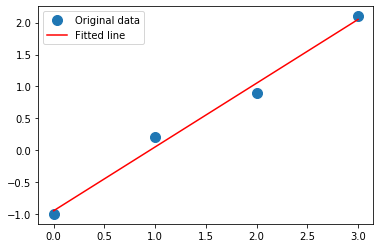

In [2]:
# Plotting the line of best fit

import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label='Original data', markersize=10)
plt.plot(x, w*x + b, 'r', label='Fitted line')
plt.legend()

#### 3.3.2 Gradient Descent 


Generally, not only is the optimization problem  in high dimension, $\text{dim}(\theta) > 10$, it is also non-convex. Therefore, $\theta$ is updated iteratively based on first order information (the gradient) so as to reach a (local) minimum. 

Let $\theta^t$ be the value of $\theta$ at the $t$-th iteration, $\theta^0$ being the initialization of the parameters,
the update rule of the standard gradient descent  is as follows,
> $
\theta^{t+1} \leftarrow \theta^{t} - \eta \nabla_{\theta^{t}}\mathcal{L}(\theta^{t}) , 
$

where $\nabla_{\theta} \ell(\theta)$ is the **gradient** of $\ell$ w.r.t to $\theta$, and $\eta$ is the 
step-size also known as **learning rate**.

In [3]:
# Solving the least-square problem in numpy

import numpy as np

# Fit a line, ``y = wx + b``, through some noisy data-points: 
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

def fit_lse(x, y):
    lr = 0.1 # the learning rate
    w = 1
    b = 0
    for i in range(20):
        # initializing the gradiant w.r.t w and b
        grad_w = 0. 
        grad_b = 0. 
        
        # Going through the entire dataset
        for _x, _y in zip(x, y):
            # accumulating the gradient w.r.t w and b
            grad_w += _x*(_x*w + b - _y) 
            grad_b += (_x*w + b - _y)
        
        # Gradient descent steps
        w = w - lr*(grad_w)
        b = b - lr*(grad_b)
        
    return w, b

w, b = fit_lse(x, y)
print("The obtained result: ", w, b)

The obtained result:  0.971198332936705 -0.8880697360278581


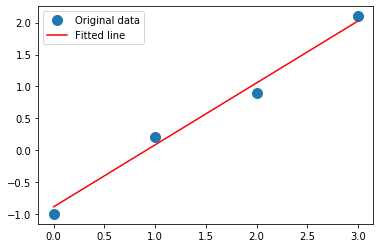

In [4]:
# Plotting the line of best fit

import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label='Original data', markersize=10)
plt.plot(x, w*x + b, 'r', label='Fitted line')
plt.legend()

### 3.4 Fitting Scenarios

- **Underfitting** occurs when our prediction function does no perform well both on the training set and the test set
- **Overfitting** occurs when the prediction function is very good on the training set but performs poorly on the test set
- **"Correct" fit** (the one we prefer) consists in having a prediction function that performs quite well on all the sets.

<img src="images/fitting.png" width="70%">